# Kernal Density Estimation

https://en.wikipedia.org/wiki/Kernel_density_estimation

Allows a better estimate of PDFs from limited numbers of samples of a random variable. A much more elegant and computationally intensive replacement for frequency histograms. Play around with n and h to see what happens.


In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Use a plotting resolution of m to generate a Gaussian distribution of mean 0 and standard deviation 1 (the default values).

In [2]:
m = 30
x = np.linspace(-3,3,m)
f = norm.pdf(x) 

Take n random samples from a gaussian distribution

In [3]:
n = 100
r = np.random.randn(n)

Set the bandwidth, either by hand or according to the rule of thumb in the article. The rule of thumb value will only be good if the underlying data is close to a Gaussian Distribution.

In [4]:
h = h_thumb = 1.06 * np.std(r,ddof=1) * n**(-0.2)
print(h)

0.41013774434155326


Make a kernel desity estimate for the pdf based on a Gaussian kernal and bandwidth h. Note that this can take a long time to calculate if there are many samples or high resolution because the calculation time is proportional to m times n and the pdf function involves exponentials. 

In [5]:
g = np.zeros(m)
for i in range(0,m):
    for j in range(0,n):
        g[i] += norm.pdf((x[i]-r[j])/h)
    g[i] /= (n*h)    

Plot the results, norming the histogram for comparison to the PDFs

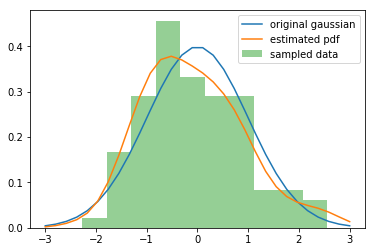

In [7]:
plt.plot(x,f, label='original gaussian')
plt.plot(x,g, label='estimated pdf')
plt.hist(r,alpha=0.5,density=True, label='sampled data')
plt.legend()